In [20]:
# bibliotecas
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
# from traitlets import validate
import sklearn.model_selection
import numpy as np
# import tensorflow as tf
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Preparo do path para os dados

Vamos definir o caminho para as imagens e carregar os caminhos em variáveis.
Após feita a leitura dos caminhos e salvo numa lista de string onde cada item é o caminho para uma imagem, vamos alocar para dataframes, um para cada classe.

Não entendi o porquê de atribuir um label com um número inteiro arbitrário, mas optei por manter por estar presente na maioria dos estudos que encontrei. Provavelmente é para diferenciar as classes.

Ao final, cria-se um dataframe com ambas classes e fazemos a leitura da imagem como matriz pela função *lambda* passada para o apply, redimensionamento da matriz imagem para 224x224 e inserida a matriz imagem redimesionada no dataframe na coluna de `mat_images`.

In [23]:
# definindo o caminho das imagens
DATA_PATH="TB_Chest_Radiography_Database"
DATA_TRAIN_NORNAL=DATA_PATH+"/Normal/"
DATA_TRAIN_Tuberculosis=DATA_PATH+"/Tuberculosis/"

Normal_img=os.listdir(DATA_TRAIN_NORNAL)
Tuberculosis_img=os.listdir(DATA_TRAIN_Tuberculosis)
# DATA2_TRAIN_NORNAL=DATA2_TRAIN_NORNAL+Normal_img
# DATA2_TEST_Tuberculosis=DATA2_TEST_Tuberculosis+Tuberculosis_img
dnorm=pd.DataFrame(Normal_img,columns=["images"])
dnorm["labels"]=0
dnorm["images"]=DATA_TRAIN_NORNAL+dnorm["images"]

dtuber=pd.DataFrame(Tuberculosis_img,columns=["images"])
dtuber["labels"]=1
dtuber["images"]=DATA_TRAIN_Tuberculosis+dtuber["images"]


DF2=pd.concat([dnorm,dtuber],ignore_index=True)
DF2["mat_images"]=DF2['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))
DF2.sample(frac=1, random_state=42).reset_index(drop=True)

,images,labels,mat_images
0,TB_Chest_Radiography_Database/Normal/Normal-25...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,TB_Chest_Radiography_Database/Normal/Normal-29...,0,"[[46, 45, 44, 44, 43, 43, 41, 41, 40, 42, 40, ..."
2,TB_Chest_Radiography_Database/Normal/Normal-25...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,TB_Chest_Radiography_Database/Normal/Normal-86...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,TB_Chest_Radiography_Database/Normal/Normal-12...,0,"[[209, 167, 163, 162, 163, 164, 163, 165, 166,..."
...,...,...,...
4195,TB_Chest_Radiography_Database/Normal/Normal-94...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4196,TB_Chest_Radiography_Database/Normal/Normal-14...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4197,TB_Chest_Radiography_Database/Normal/Normal-63...,0,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4198,TB_Chest_Radiography_Database/Tuberculosis/Tub...,1,"[[36, 76, 45, 44, 35, 19, 16, 16, 16, 17, 17, ..."


## Informações sobre o Dataframe

In [15]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   images      4200 non-null   object
 1   labels      4200 non-null   int64 
 2   mat_images  4200 non-null   object
dtypes: int64(1), object(2)
memory usage: 98.6+ KB


## Descrição

In [16]:
DF2.describe()

,labels
count,4200.000000
mean,1.333333
std,0.745445
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


## Distribuição por classe

labels
1    3500
3     700
Name: count, dtype: int64


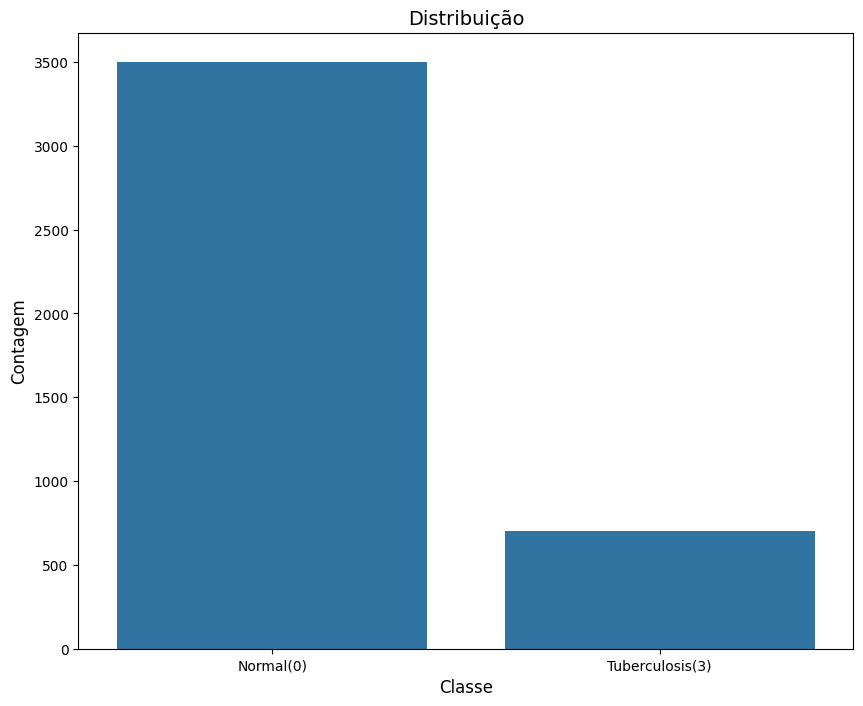

In [22]:
cases_count = DF2['labels'].value_counts()
print(cases_count)

plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Distribuição', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()